  # PostProcessing
  This notebook is initially designed for PostProcessing ASETS-II numerical and experimental data.
  It can also be used for other configurations's numerical results. But if you want to compare with other experimental data with a different format than ASETS-II. You should find a way to read them to RTD and RTDt in this notebook.

In [2]:
using OscillatingHeatPipe
using Plots
using JLD2
# using Interact
using Statistics
# using EasyFit
# import XLSX

┌ Warning: MKL_jll is not available/installed.
└ @ MKL ~/.julia/packages/MKL/kCNzy/src/MKL.jl:39


In [3]:
function get_qbplus(t,x,base_cache,phys_params,motions)
    nrm = normals(base_cache)
    qbplus = zeros_surface(base_cache)
    return qbplus
end

function get_qbminus(t,x,base_cache,phys_params,motions)
    nrm = normals(base_cache)
    qbminus = zeros_surface(base_cache)
    # qbminus .= nrm.u
    return qbminus
end

bcdict = Dict("exterior" => get_qbplus,"interior" => get_qbminus)

Dict{String, Function} with 2 entries:
  "interior" => get_qbminus
  "exterior" => get_qbplus

In [4]:
function heatermodel!(σ,T,t,fr::AreaRegionCache,phys_params)
    σ .= phys_params["areaheater_power"] / phys_params["areaheater_area"] / phys_params["flux_correction"] 
end


function condensermodel!(σ,T,t,fr::AreaRegionCache,phys_params)
    T0 = phys_params["areaheater_temp"]
    h = phys_params["areaheater_coeff"]
    corr = phys_params["flux_correction"] 

    σ .= h*(T0 - T) / corr
end

function adiabaticmodel!(σ,T,t,fr::AreaRegionCache,phys_params)
    T0 = phys_params["areaheater_temp"]
    h = phys_params["adiabatic_coeff"]
    corr = phys_params["flux_correction"] 

    σ .= h*(T0 - T)/ corr
end

adiabaticmodel! (generic function with 1 method)

In [46]:

function ohpmodel!(σ,T,t,fr::LineRegionCache,phys_params)
    σ .= phys_params["ohp_flux"] ./ phys_params["flux_correction"] 
end

ohpmodel! (generic function with 1 method)

In [47]:
file_list = ["H01_C15_T01.jld2",
             "H01_C15_T02.jld2",
             "H01_C15_T03.jld2",
             "H01_C15_T04.jld2",
             "H01_C15_T05.jld2",
             "H01_C15_T06.jld2",
             "H01_C15_T07.jld2",
             "H01_C15_T08.jld2"]

file_path = "/Users/yuxuanli/Documents/Hoffman/zach165/numedata/"

"/Users/yuxuanli/Documents/Hoffman/zach165/numedata/"

In [66]:
x2Dsensors = [0.0,   0.0, 0.0, 0.0, 0.0,-3INCHES+12e-3,-3INCHES+35e-3,-3INCHES+50e-3,3INCHES-50e-3,3INCHES-35e-3,3INCHES-12e-3]
y2Dsensors = [-2e-2, -1e-2, 0.0, 1e-2, 2e-2,0.0,           0.0,            0.0,          0.0,          0.0,          0.0]
plate_sensors = (x2Dsensors,y2Dsensors);

In [67]:
# x2Dsensors = [0.0,   0.0, 0.0, 0.0, 0.0,-3INCHES+15e-3,-3INCHES+35e-3,-3INCHES+50e-3,3INCHES-50e-3,3INCHES-35e-3,3INCHES-15e-3]
# y2Dsensors = [-2e-2, -1e-2, 0.0, 1e-2, 2e-2,0.0,           0.0,            0.0,          0.0,          0.0,          0.0]
# plate_sensors = (x2Dsensors,y2Dsensors);

In [50]:
cond_all = []
dT_all = []
power = 0.0
plt = plot()
for file_name in file_list
    read_path = file_path*file_name
    SimuResult = load(read_path)["SimulationResult"];
    t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
    
    ihot = 3 # hot sensor  for calculating thermal conductance
    icold = 11# cold sensor  for calculating thermal conductance;
    power = SimuResult.integrator_tube.p.wall.power

    println(g_hist[end])
    
    # push!(cond_all,power./(g_hist[:,ihot] - g_hist[:,icold]);)
    push!(dT_all,(g_hist[:,ihot] - g_hist[:,icold]))
    
#     plot!(OHPCond(),(ihot,icold),(t_hist,g_hist),(RTDt,RTD),SimuResult,ylim=(0,15))
end

┌ Warning: read type ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing} is not a leaf type in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:300
┌ Warning: read type OrdinaryDiffEq.InterpolationData has a different number of parameters from type OrdinaryDiffEq.InterpolationData in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:591
┌ Warning: read type ODESolution has a different number of parameters from type ODESolution in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:591
┌ Warning: read type OrdinaryDiffEq.ODEIntegrator has a different number of parameters from type OrdinaryDiffEq.ODEIntegrator in worksp

In [51]:
read_path = file_path*file_list[1]
SimuResult = load(read_path)["SimulationResult"];
t = SimuResult.tube_hist_t;

┌ Warning: read type ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing} is not a leaf type in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:300
┌ Warning: read type OrdinaryDiffEq.InterpolationData has a different number of parameters from type OrdinaryDiffEq.InterpolationData in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:591
┌ Warning: read type ODESolution has a different number of parameters from type ODESolution in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:591
┌ Warning: read type OrdinaryDiffEq.ODEIntegrator has a different number of parameters from type OrdinaryDiffEq.ODEIntegrator in worksp

In [52]:
# cond_max = maximum(hcat(cond_all...),dims=2);
# cond_min = minimum(hcat(cond_all...),dims=2);

dT_max = maximum(hcat(dT_all...),dims=2);
dT_min = minimum(hcat(dT_all...),dims=2);

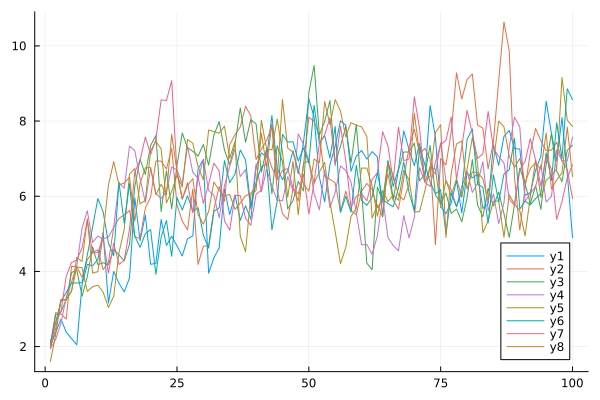

In [53]:
plot(dT_all)

In [54]:
import XLSX

In [55]:
xf = XLSX.readxlsx("../expdata/T01_H06_C18_S01.xlsx")
RTDcold1 = xf["TC Data"]["C3602:C9602"]
RTDcold1 = RTDcold1[1:60:end]
RTDhot = xf["TC Data"]["F3602:F9602"]
RTDhot = RTDhot[1:60:end]
RTDcold2 = xf["TC Data"]["J3602:J9602"]
RTDcold2 = RTDcold2[1:60:end]

DT_exp = RTDhot - (RTDcold1 + RTDcold2)/2;

In [56]:
mean(40 ./ hcat(dT_all...)[51:end,:])

6.154616167120476

In [57]:
mean(40 ./ DT_exp[51:100])

10.513237068424235

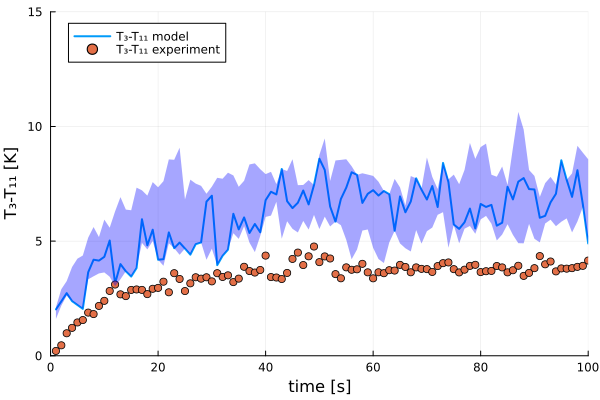

In [58]:
gr()
# plot(OHPCond(),(ihot,icold),(t_hist,g_hist),(RTDt,RTD),SimuResult,ylim=(0,5))
plot(t,dT_all[1],xlim=(0,100.0),ylim=(0,15),linewidth=2,label="T₃-T₁₁ model",ylabel="T₃-T₁₁ [K]",legend=:topleft, xlabel="time [s]")
scatter!(DT_exp,label="T₃-T₁₁ experiment")
plot!(dT_max,fillrange = dT_min,fillalpha = 0.35,fillcolor=:blue,linewidth=0,alpha=0,label=false,title="")
# plot!(twinx(),t_boil,m10.x,
# color=:orange, xlim=(0,300.0),ylim=(0,100),legend=:top,linewidth=2, ylabel="f [Hz]", label="boiling frequency")
# savefig("cond_curve.pdf")
# savefig("cond_curve H01.pdf")

In [18]:
scatter(3000:1000:10000,mean(40 ./ hcat(dT_all...)[51:100,:],dims=1)'
,linewidth=2,ylim=(0,15),label="model thermal conductance",ylabel="G [W/K]",legend=:topleft, xlabel="condenser heat transfer coefficient [W/m²K]")
plot!([3000,10000],[10.51,10.51],linewidth=2,linestyle=:dash,label="ground experiment reference")
plot!([3000,10000],[6.9,6.9],linewidth=2,linestyle=:dash,label="on-orbit experiment reference (slightly different layout)")

savefig("h cond H01.pdf")

"/Users/yuxuanli/Documents/GitHub/OscillatingHeatPipe/examples/h cond H01.pdf"

In [19]:
file_list = ["H01_C15_R01.jld2",
             "H01_C15_R02.jld2",
             "H01_C15_R03.jld2",
             "H01_C15_R04.jld2",
             "H01_C15_R05.jld2",
             "H01_C15_R06.jld2",
             "H01_C15_R07.jld2",
             "H01_C15_R08.jld2",
             "H01_C15_R09.jld2",
             "H01_C15_R10.jld2",
             "H01_C15_R11.jld2"]

file_path = "/Users/yuxuanli/Documents/Hoffman/zach166/numedata/"

"/Users/yuxuanli/Documents/Hoffman/zach166/numedata/"

In [20]:
cond_all = []
dT_all = []
power = 0.0
plt = plot()
for file_name in file_list
    read_path = file_path*file_name
    SimuResult = load(read_path)["SimulationResult"];
    t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
    
    ihot = 3 # hot sensor  for calculating thermal conductance
    icold = 11# cold sensor  for calculating thermal conductance;
    power = SimuResult.integrator_tube.p.wall.power

    println(g_hist[end])
    
    # push!(cond_all,power./(g_hist[:,ihot] - g_hist[:,icold]);)
    push!(dT_all,(g_hist[:,ihot] - g_hist[:,icold]))
    
#     plot!(OHPCond(),(ihot,icold),(t_hist,g_hist),(RTDt,RTD),SimuResult,ylim=(0,15))
end

┌ Warning: read type ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing} is not a leaf type in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:300
┌ Warning: read type OrdinaryDiffEq.InterpolationData has a different number of parameters from type OrdinaryDiffEq.InterpolationData in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:591
┌ Warning: read type ODESolution has a different number of parameters from type ODESolution in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:591
┌ Warning: read type OrdinaryDiffEq.ODEIntegrator has a different number of parameters from type OrdinaryDiffEq.ODEIntegrator in worksp

In [21]:
scatter(0.36:0.02:0.56,mean(40 ./ hcat(dT_all...)[51:100,:],dims=1)'
,linewidth=2,ylim=(0,15),label="model thermal conductance",ylabel="G [W/K]",legend=:topleft, xlabel="charge ratio")
plot!([0.36,0.56],[10.51,10.51],linewidth=2,linestyle=:dash,label="ground experiment reference")
plot!([0.36,0.56],[6.9,6.9],linewidth=2,linestyle=:dash,label="on-orbit experiment reference (slightly different layout)")

savefig("charge cond H01.pdf")

"/Users/yuxuanli/Documents/GitHub/OscillatingHeatPipe/examples/charge cond H01.pdf"

In [59]:
file_list = ["H01_C15_T01.jld2",
             "H01_C15_T02.jld2",
             "H01_C15_T03.jld2",
             "H01_C15_T04.jld2",
             "H01_C15_T05.jld2",
             "H01_C15_T06.jld2",
             "H01_C15_T07.jld2"]

file_path = "/Users/yuxuanli/Documents/Hoffman/zach167/numedata/"

"/Users/yuxuanli/Documents/Hoffman/zach167/numedata/"

In [68]:
cond_all = []
dT_all = []
power = 0.0
plt = plot()
for file_name in file_list
    read_path = file_path*file_name
    SimuResult = load(read_path)["SimulationResult"];
    t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
    
    ihot = 3 # hot sensor  for calculating thermal conductance
    icold = 11# cold sensor  for calculating thermal conductance;
    power = SimuResult.integrator_tube.p.wall.power
    
    # push!(cond_all,power./(g_hist[:,ihot] - g_hist[:,icold]);)
    push!(dT_all,(g_hist[:,ihot] - g_hist[:,icold]))
    
#     plot!(OHPCond(),(ihot,icold),(t_hist,g_hist),(RTDt,RTD),SimuResult,ylim=(0,15))
end

┌ Warning: read type ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing} is not a leaf type in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:300
┌ Warning: read type OrdinaryDiffEq.InterpolationData has a different number of parameters from type OrdinaryDiffEq.InterpolationData in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:591
┌ Warning: read type ODESolution has a different number of parameters from type ODESolution in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:591
┌ Warning: read type OrdinaryDiffEq.ODEIntegrator has a different number of parameters from type OrdinaryDiffEq.ODEIntegrator in worksp

In [69]:
# cond_max = maximum(hcat(cond_all...),dims=2);
# cond_min = minimum(hcat(cond_all...),dims=2);

dT_max = maximum(hcat(dT_all...),dims=2);
dT_min = minimum(hcat(dT_all...),dims=2);

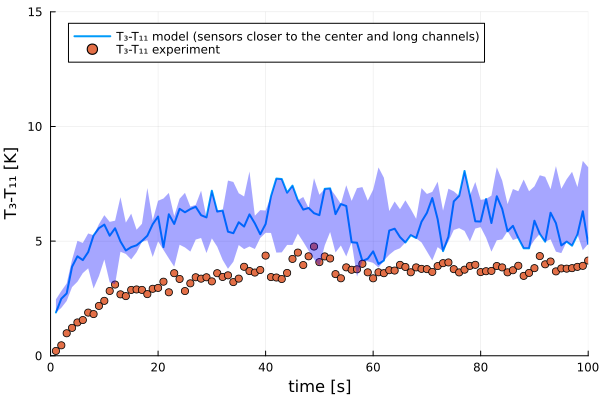

In [70]:
gr()
# plot(OHPCond(),(ihot,icold),(t_hist,g_hist),(RTDt,RTD),SimuResult,ylim=(0,5))
plot(t,dT_all[1],xlim=(0,100.0),ylim=(0,15),linewidth=2,label="T₃-T₁₁ model (sensors closer to the center and long channels)",ylabel="T₃-T₁₁ [K]",legend=:topleft, xlabel="time [s]")
scatter!(DT_exp,label="T₃-T₁₁ experiment")
plot!(dT_max,fillrange = dT_min,fillalpha = 0.35,fillcolor=:blue,linewidth=0,alpha=0,label=false,title="")
# plot!(twinx(),t_boil,m10.x,
# color=:orange, xlim=(0,300.0),ylim=(0,100),legend=:top,linewidth=2, ylabel="f [Hz]", label="boiling frequency")
# savefig("cond_curve.pdf")
# savefig("cond_curve H01 long channel edge sensor.pdf")

In [71]:
mean(dT_all[1][51:100])

5.648004657002624

In [35]:
mean(40 ./ hcat(dT_all...)[51:end,:])

8.0135203345431

In [41]:
file_list = ["H01_C15_T01.jld2",
             "H01_C15_T02.jld2",
             "H01_C15_T03.jld2",
             "H01_C15_T04.jld2",
             "H01_C15_T05.jld2",
             "H01_C15_T06.jld2",
             "H01_C15_T07.jld2"]

file_path = "/Users/yuxuanli/Documents/Hoffman/zach163/numedata/"

"/Users/yuxuanli/Documents/Hoffman/zach163/numedata/"

In [42]:
cond_all = []
dT_all = []
power = 0.0
plt = plot()
for file_name in file_list
    read_path = file_path*file_name
    SimuResult = load(read_path)["SimulationResult"];
    t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
    
    ihot = 3 # hot sensor  for calculating thermal conductance
    icold = 11# cold sensor  for calculating thermal conductance;
    power = SimuResult.integrator_tube.p.wall.power

    println(g_hist[end])
    
    # push!(cond_all,power./(g_hist[:,ihot] - g_hist[:,icold]);)
    push!(dT_all,(g_hist[:,ihot] - g_hist[:,icold]))
    
#     plot!(OHPCond(),(ihot,icold),(t_hist,g_hist),(RTDt,RTD),SimuResult,ylim=(0,15))
end

┌ Warning: read type ODEFunction{false, SciMLBase.AutoSpecialize, typeof(ODE_innertube), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing} is not a leaf type in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:300
┌ Warning: read type OrdinaryDiffEq.InterpolationData has a different number of parameters from type OrdinaryDiffEq.InterpolationData in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:591
┌ Warning: read type ODESolution has a different number of parameters from type ODESolution in workspace; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:591
┌ Warning: read type OrdinaryDiffEq.ODEIntegrator has a different number of parameters from type OrdinaryDiffEq.ODEIntegrator in worksp

LoadError: ArgumentError: No file exists at given path: /Users/yuxuanli/Documents/Hoffman/zach163/numedata/H01_C15_T04.jld2

In [43]:
# cond_max = maximum(hcat(cond_all...),dims=2);
# cond_min = minimum(hcat(cond_all...),dims=2);

dT_max = maximum(hcat(dT_all...),dims=2);
dT_min = minimum(hcat(dT_all...),dims=2);

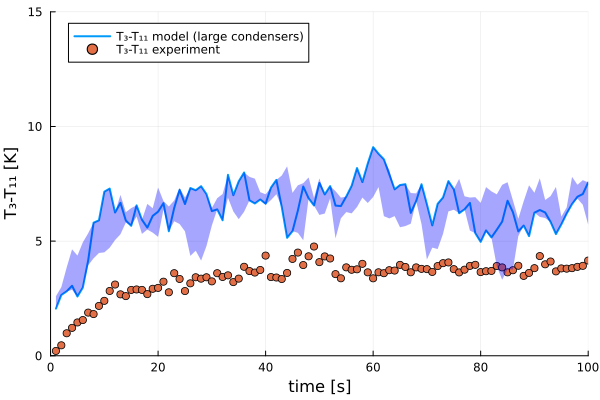

In [44]:
gr()
# plot(OHPCond(),(ihot,icold),(t_hist,g_hist),(RTDt,RTD),SimuResult,ylim=(0,5))
plot(t,dT_all[1],xlim=(0,100.0),ylim=(0,15),linewidth=2,label="T₃-T₁₁ model (large condensers)",ylabel="T₃-T₁₁ [K]",legend=:topleft, xlabel="time [s]")
scatter!(DT_exp,label="T₃-T₁₁ experiment")
plot!(dT_max,fillrange = dT_min,fillalpha = 0.35,fillcolor=:blue,linewidth=0,alpha=0,label=false,title="")
# plot!(twinx(),t_boil,m10.x,
# color=:orange, xlim=(0,300.0),ylim=(0,100),legend=:top,linewidth=2, ylabel="f [Hz]", label="boiling frequency")
# savefig("cond_curve.pdf")
# savefig("cond_curve H01 large condensers.pdf")

In [83]:
read_path_array = [
"../numedata/ASETS-L-1-10.jld2",
"../numedata/ASETS-L-1-20.jld2",
"../numedata/ASETS-L-1-30.jld2",
"../numedata/ASETS-L-1-40.jld2",
"../numedata/ASETS-S-1-10.jld2",
"../numedata/ASETS-S-1-20.jld2",
"../numedata/ASETS-S-1-30.jld2",
"../numedata/ASETS-S-1-40.jld2",
"../numedata/ASETS-L-2-10.jld2",
"../numedata/ASETS-L-2-20.jld2",
"../numedata/ASETS-L-2-30.jld2",
"../numedata/ASETS-L-2-40.jld2",
"../numedata/ASETS-S-2-10.jld2",
"../numedata/ASETS-S-2-20.jld2",
"../numedata/ASETS-S-2-30.jld2",
"../numedata/ASETS-S-2-40.jld2"
]
exp_path_array = [
    "O001_H001_P010",
    "O001_H001_P020",
    "O001_H001_P030",
    "O001_H001_P040",
    "O001_H002_P010",
    "O001_H002_P020",
    "O001_H002_P030",
    "O001_H002_P040",
    "O002_H001_P010",
    "O002_H001_P020",
    "O002_H001_P030",
    "O002_H001_P040",
    "O002_H002_P010",
    "O002_H002_P020",
    "O002_H002_P030",
    "O002_H002_P040"
]

exppath = "/Users/yuxuanli/Documents/Hoffman/ohp95/expdata/"

function getallcond(readpath,read_path_array,exppath,exp_path_array,plate_sensors)
    cd(readpath)
    
    conductance_array = zeros(size(read_path_array))
    expcond_array = zeros(size(read_path_array))
    avgδ_array = zeros(size(read_path_array))
    nume_postdryout = 0.0
    exp_postdryout = 0.0

    for i in eachindex(read_path_array)
        SimuResult = load(read_path_array[i])["SimulationResult"];
        
        t_hist,g_hist = getTcurve(plate_sensors,SimuResult);
        power = SimuResult.integrator_tube.p.wall.power

        println(i,power)

        ihot = 4 # hot sensor  for calculating thermal conductance
        icold = 8 # c
        cond = power ./ (g_hist[:,ihot] .- g_hist[:,icold])

        conductance_array[i] = mean(cond[100:200])
#         avgδ_array[i] = get_avgδ(SimuResult)


        expfile = expfileDict[exp_path_array[i]]
#         exppath = "/Users/yuxuanli/Documents/Hoffman/ohp95/expdata/"
        xf = XLSX.readxlsx(exppath*expfile);

        Onum, Hnum, power_exp = getconfig(expfile)
        RTDt,RTD = getRTD(xf,Onum);

        cond_exp = power ./ (RTD[:,ihot] .- RTD[:,icold])

        expcond_array[i] = mean(cond_exp[100:200])

        if exp_path_array[i] == "O002_H001_P040"
            exp_postdryout = mean(cond_exp[250:300])
            nume_postdryout = mean(cond[250:300])
        end
    end

    return conductance_array,expcond_array,exp_postdryout,nume_postdryout
end

getallcond (generic function with 1 method)

In [84]:
conductance_array_all = []
for readpath in dir_paths
    conductance_array,expcond_array,exp_postdryout,nume_postdryout = getallcond(readpath,read_path_array,exppath,exp_path_array,plate_sensors);
    push!(conductance_array_all,conductance_array)
end

110.0
220.0
330.0
440.0
510.0
620.0
730.0
840.0
910.0
1020.0
1130.0
1240.0
1310.0
1420.0
1530.0
1640.0
110.0
220.0
330.0
440.0
510.0
620.0
730.0
840.0
910.0
1020.0
1130.0
1240.0
1310.0
1420.0
1530.0
1640.0
110.0
220.0
330.0
440.0
510.0
620.0
730.0
840.0
910.0
1020.0
1130.0
1240.0
1310.0
1420.0
1530.0
1640.0
110.0
220.0
330.0
440.0
510.0
620.0
730.0
840.0
910.0
1020.0
1130.0
1240.0
1310.0
1420.0
1530.0
1640.0
110.0
220.0
330.0
440.0
510.0
620.0
730.0
840.0
910.0
1020.0
1130.0
1240.0
1310.0
1420.0
1530.0
1640.0
110.0
220.0
330.0
440.0
510.0
620.0
730.0
840.0
910.0
1020.0
1130.0
1240.0
1310.0
1420.0
1530.0
1640.0
110.0
220.0
330.0
440.0
510.0
620.0
730.0
840.0
910.0
1020.0
1130.0
1240.0
1310.0
1420.0
1530.0
1640.0


In [40]:
readpath = "/Users/yuxuanli/Documents/Hoffman/ohp162/numedata"
conductance_array,expcond_array,exp_postdryout,nume_postdryout = getallcond(readpath,read_path_array,exppath,exp_path_array,plate_sensors);

110.0
220.0
330.0
440.0
510.0
620.0
730.0
840.0
910.0
1020.0
1130.0
1240.0
1310.0
1420.0
1530.0
1640.0


In [85]:
conductance_array = vec(mean(hcat(conductance_array_all...),dims=2))
cond_err_max = vec(maximum(hcat(conductance_array_all...),dims=2) .- conductance_array)
cond_err_min = vec(-(minimum(hcat(conductance_array_all...),dims=2) .- conductance_array));
# σavg = std(hcat(conductance_array_all...),dims=2);

In [86]:
conductance_array[plotrange]

4-element Vector{Float64}:
 3.7642465150405777
 6.303638108765004
 6.233366401506048
 5.792706013890706

In [87]:
cd("/Users/yuxuanli/Documents/Hoffman/ohp95/numedata/")

In [96]:
powers = [10,20,30,40]
plotrange = 1:4
scatter(powers,conductance_array[plotrange],markersize=5,color=:blue,markeralpha=0.5,marker=:square,yerror=(cond_err_min[plotrange],cond_err_max[plotrange]))
scatter!(powers,expcond_array[plotrange],markersize=5,markeralpha=0.5,color=:red,
ylim=(0,8),legend=false,xlabel="heater power [W]",ylabel="G [W/K]")
savefig("cond all 1L.pdf")

"/Users/yuxuanli/Documents/Hoffman/ohp95/numedata/cond all 1L.pdf"

In [97]:
powers = [10,20,30,40]
plotrange = 5:8
scatter(powers,conductance_array[plotrange],markersize=5,markeralpha=0.5,color=:blue,marker=:square,yerror=(cond_err_min[plotrange],cond_err_max[plotrange]))
scatter!(powers,expcond_array[plotrange],markersize=5,markeralpha=0.5,color=:red,
ylim=(0,8),legend=false,xlabel="heater power [W]",ylabel="G [W/K]")
savefig("cond all 1S.pdf")

"/Users/yuxuanli/Documents/Hoffman/ohp95/numedata/cond all 1S.pdf"

In [98]:
powers = [10,20,30,40]
plotrange = 9:12
scatter(powers,conductance_array[plotrange],markersize=5,markeralpha=0.5,color=:blue,marker=:square,yerror=(cond_err_min[plotrange],cond_err_max[plotrange]),label="")
scatter!(powers,expcond_array[plotrange],markersize=5,markeralpha=0.5,color=:red,label="",
ylim=(0,8),legend=true,xlabel="heater power [W]",ylabel="G [W/K]")
plot!([40,40],[expcond_array[12],exp_postdryout],markersize=5,markeralpha=0.5,linewidth=2,marker=:xcross,color=:red,label="experimental dryout")
# scatter!([40],[nume_postdryout],markersize=5,markeralpha=0.5,color=:blue,marker=:square,legend=true,label="")
savefig("cond all 2L.pdf")

"/Users/yuxuanli/Documents/Hoffman/ohp95/numedata/cond all 2L.pdf"

In [99]:
powers = [10,20,30,40]
plotrange = 13:16
scatter(powers,conductance_array[plotrange],markersize=5,markeralpha=0.5,color=:blue,marker=:square,yerror=(cond_err_min[plotrange],cond_err_max[plotrange]))
scatter!(powers,expcond_array[plotrange],markersize=5,markeralpha=0.5,color=:red,
ylim=(0,8),legend=false,xlabel="heater power [W]",ylabel="G [W/K]")
savefig("cond all 2S.pdf")

"/Users/yuxuanli/Documents/Hoffman/ohp95/numedata/cond all 2S.pdf"

In [95]:
maximum(abs.(1 .- [conductance_array[1]./expcond_array[1]]))

0.23780132361691642

#### 